In [7]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
from skimage import color
import cv2
from statistics import mean
from skimage import feature
import matplotlib.pyplot as plt

In [8]:
image1 = cv2.imread('image-example1.png')
image1gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image2 = cv2.imread('image-example2.png')
image2gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image1resized = cv2.resize(image1gray, (250,150), interpolation=cv2.INTER_LINEAR)
image2resized = cv2.resize(image2gray, (250,150), interpolation=cv2.INTER_LINEAR)

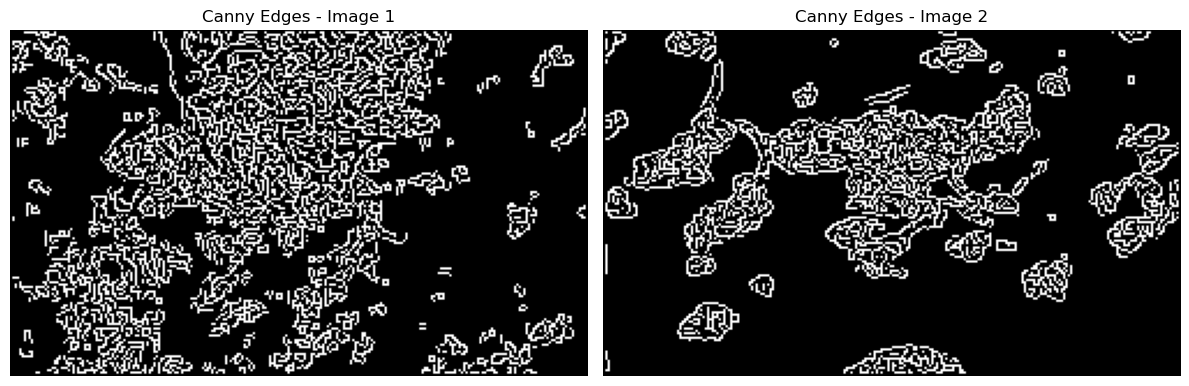

In [9]:
def apply_canny_with_sigma(image, sigma=0.7):
    return feature.canny(image, sigma=sigma)

# Normaliseer en pas Canny toe
edges1 = apply_canny_with_sigma(image1resized / 255.0, sigma=0.7)
edges2 = apply_canny_with_sigma(image2resized / 255.0, sigma=0.7)

# Toon de resultaten
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(edges1, cmap='gray')
axes[0].set_title("Canny Edges - Image 1")
axes[0].axis('off')

axes[1].imshow(edges2, cmap='gray')
axes[1].set_title("Canny Edges - Image 2")
axes[1].axis('off')

plt.tight_layout()
plt.show()

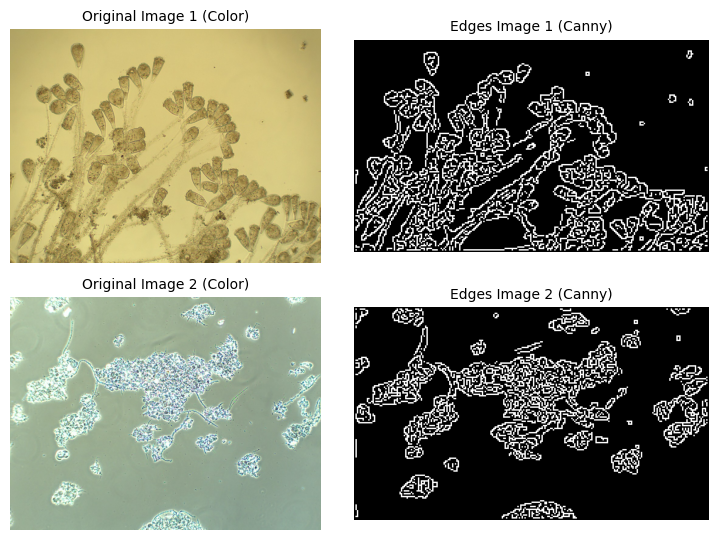

In [10]:
import cv2
import matplotlib.pyplot as plt
from skimage import feature

# Inlezen van de originele kleurafbeeldingen
image1 = cv2.imread('badimage4.jpg')
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('image-example2.png')
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Functie voor Canny edge detection op resized beelden
def apply_canny_with_sigma(image_bgr, sigma=0.7):
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (250, 150), interpolation=cv2.INTER_LINEAR)
    return feature.canny(resized / 255.0, sigma=sigma)

# Pas Canny toe
edges1 = apply_canny_with_sigma(image1)
edges2 = apply_canny_with_sigma(image2)

# Compacte figuur opmaken
fig, axes = plt.subplots(2, 2, figsize=(7.5, 5.5))  # past mooi op A4

titles = [
    "Original Image 1 (Color)",
    "Edges Image 1 (Canny)",
    "Original Image 2 (Color)",
    "Edges Image 2 (Canny)"
]

images = [image1_rgb, edges1, image2_rgb, edges2]
cmaps = [None, 'gray', None, 'gray']

for ax, img, title, cmap in zip(axes.ravel(), images, titles, cmaps):
    ax.imshow(img, cmap=cmap)
    ax.set_title(title, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig("canny_comparison.pdf", bbox_inches='tight')  # sla op voor LaTeX
plt.show()